In [21]:
from qwanta.Qubit import PhysicalQubit, GetQubit, DirectFidelityEstimator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, simplify, latex, cse, factor
from sympy.plotting import plot 

import seaborn as sns

sns.set_theme(context='notebook')
#sns.set_palette(sns.color_palette("ch:s=-.2,r=.6"))


### Without purificaition

In [3]:
Paulis = ['I', 'X', 'Y', 'Z']

errors_one = []
for pauli_1 in Paulis:
    for pauli_2 in Paulis:
        errors_one.append(''.join([pauli_1, pauli_2]))

In [4]:
results = []
p = symbols('p')
for error in errors_one:

    tmp = {}

    Bell00, Bell01 = GetQubit(), GetQubit()
    qubitList = [Bell00, Bell01]

    # Apply error to qubit
    prob = 1
    for index, (e, q) in enumerate(zip(error, qubitList)):
        if e == 'X':
            q.addXerror()
        if e == 'Y':
            q.addXerror()
            q.addZerror()
        if e == 'Z':
            q.addZerror()
        if e == 'I':
            prob *= 1- p
        else:
            prob *= p/3
        tmp[f'q{index}'] = e

    # Record result
    tmp['probability'] = prob

    # Check each basis
    is_Bell = True
    # Z-basis
    if Bell00.error_x != Bell01.error_x:
        is_Bell = False

    # X-basis
    if Bell00.error_z != Bell01.error_z:
        is_Bell = False

    # Y-basis
    if (Bell00.error_x != Bell00.error_z) != (Bell01.error_x != Bell01.error_z):
        is_Bell = False


    tmp['is Bell'] = is_Bell

    results.append(tmp)

dataframe_without_purification = pd.DataFrame(results)

In [5]:
fidelity_without_purification = sum( dataframe_without_purification.loc[dataframe_without_purification['is Bell'] == True]['probability'] )

def fidelity_wo_purification(x):
    return fidelity_without_purification.subs(p, x)

In [6]:
fidelity_without_purification

p**2/3 + (1 - p)**2

### X purification

In [7]:
Paulis = ['I', 'X', 'Y', 'Z']

errors = []
for pauli_1 in Paulis:
    for pauli_2 in Paulis:
        for pauli_3 in Paulis:
            for pauli_4 in Paulis:
                errors.append(''.join([pauli_1, pauli_2, pauli_3, pauli_4]))

In [8]:
results = []
p = symbols('p')
for error in errors:

    tmp = {}

    Bell00, Bell01, Bell10, Bell11 = GetQubit(), GetQubit(), GetQubit(), GetQubit()
    qubitList = [Bell00, Bell01, Bell10, Bell11]
    
    # Apply error to qubit
    prob = 1
    for index, (e, q) in enumerate(zip(error, qubitList)):
        if e == 'X':
            q.addXerror()
        if e == 'Y':
            q.addXerror()
            q.addZerror()
        if e == 'Z':
            q.addZerror()
        if e == 'I':
            prob *= 1- p
        else:
            prob *= p/3
        tmp[f'q{index}'] = e

    # X purification
    Bell10.CNOT_gate(Bell00)
    Bell11.CNOT_gate(Bell01)

    res1 = Bell10.measureZ()
    res2 = Bell11.measureZ()

    # Record result
    tmp['probability'] = prob
    tmp['purification result'] = 'Success' if res1 == res2 else 'Fail'

    # Check each basis
    is_Bell = True
    # Z-basis
    if Bell00.error_x != Bell01.error_x:
        is_Bell = False

    # X-basis
    if Bell00.error_z != Bell01.error_z:
        is_Bell = False

    # Y-basis
    if (Bell00.error_x != Bell00.error_z) != (Bell01.error_x != Bell01.error_z):
        is_Bell = False


    tmp['is Bell'] = is_Bell

    results.append(tmp)

dataframe = pd.DataFrame(results)

In [9]:
normalizer = dataframe.loc[dataframe['purification result'] == 'Success']
Bell_demo = dataframe.loc[(dataframe['purification result'] == 'Success') & (dataframe['is Bell'] == True)]
purified_fidelity = sum(Bell_demo['probability']) / sum(normalizer['probability'])

def fidelity_X_purification(x):
    return purified_fidelity.subs(p, x)

In [45]:
purified_fidelity

(13*p**4/81 + 8*p**3*(1 - p)/27 + 10*p**2*(1 - p)**2/9 + (1 - p)**4)/(41*p**4/81 + 52*p**3*(1 - p)/27 + 10*p**2*(1 - p)**2/3 + 4*p*(1 - p)**3/3 + (1 - p)**4)

### Ss-Dp

In [34]:
Paulis = ['I', 'X', 'Y', 'Z']

errors_Ss_Dp = []
for pauli_1 in Paulis:
    for pauli_2 in Paulis:
        for pauli_3 in Paulis:
            for pauli_4 in Paulis:
                for pauli_5 in Paulis:
                    for pauil_6 in Paulis:
                        errors_Ss_Dp.append(''.join([pauli_1, pauli_2, pauli_3, pauli_4, pauli_5, pauil_6]))

In [40]:
results = []
p = symbols('p')
p_gate = symbols('p_gate')
p_measure = symbols('p_measure')
for error in errors_Ss_Dp:

    tmp = {}

    Bell00, Bell01, Bell10, Bell11, Bell20, Bell21 = GetQubit(), GetQubit(), GetQubit(), GetQubit() , GetQubit(), GetQubit()
    qubitList = [Bell00, Bell01, Bell10, Bell11, Bell20, Bell21]
    
    # Apply error to qubit
    prob = 1
    for index, (e, q) in enumerate(zip(error, qubitList)):
        if e == 'X':
            q.addXerror()
        if e == 'Y':
            q.addXerror()
            q.addZerror()
        if e == 'Z':
            q.addZerror()
        if e == 'I':
            prob *= 1- p
        else:
            prob *= p/3
        tmp[f'q{index}'] = e

    

    # Ss-Dp purification
    Bell10.CNOT_gate(Bell00)


    Bell11.CNOT_gate(Bell01)

    Bell00.CNOT_gate(Bell20)
    Bell01.CNOT_gate(Bell21)

    resX1 = Bell10.measureZ()
    resX2 = Bell11.measureZ()

    resZ1 = Bell20.measureX()
    resZ2 = Bell21.measureX()

    # Record result
    tmp['probability'] = prob
    tmp['purification result'] = 'Success' if (resX1 == resX2) and (resZ1 == resZ2) else 'Fail'

    # Check each basis
    is_Bell = True
    # Z-basis
    if Bell00.error_x != Bell01.error_x:
        is_Bell = False

    # X-basis
    if Bell00.error_z != Bell01.error_z:
        is_Bell = False

    # Y-basis
    if (Bell00.error_x != Bell00.error_z) != (Bell01.error_x != Bell01.error_z):
        is_Bell = False

    tmp['is Bell'] = is_Bell

    results.append(tmp)

dataframe_Ss_Dp = pd.DataFrame(results)

In [41]:
dataframe_Ss_Dp

,q0,q1,q2,q3,q4,q5,probability,purification result,is Bell
0,I,I,I,I,I,I,(1 - p)**6,Success,True
1,I,I,I,I,I,X,p*(1 - p)**5/3,Success,False
2,I,I,I,I,I,Y,p*(1 - p)**5/3,Fail,False
3,I,I,I,I,I,Z,p*(1 - p)**5/3,Fail,True
4,I,I,I,I,X,I,p*(1 - p)**5/3,Success,False
...,...,...,...,...,...,...,...,...,...
4091,Z,Z,Z,Z,Y,Z,p**6/729,Success,False
4092,Z,Z,Z,Z,Z,I,p**5*(1 - p)/243,Fail,True
4093,Z,Z,Z,Z,Z,X,p**6/729,Fail,False
4094,Z,Z,Z,Z,Z,Y,p**6/729,Success,False


In [43]:
normalizer = dataframe_Ss_Dp.loc[dataframe_Ss_Dp['purification result'] == 'Success']
Bell_demo = dataframe_Ss_Dp.loc[(dataframe_Ss_Dp['purification result'] == 'Success') & (dataframe_Ss_Dp['is Bell'] == True)]
Ss_Dp_fidelity = sum(Bell_demo['probability']) / sum(normalizer['probability'])

def fidelity_Ss_Dp(x):
    return Ss_Dp_fidelity.subs(p, x)

In [46]:
Ss_Dp_fidelity

(55*p**6/729 + 8*p**5*(1 - p)/27 + 91*p**4*(1 - p)**2/81 + 8*p**3*(1 - p)**3/9 + 13*p**2*(1 - p)**4/9 + (1 - p)**6)/(185*p**6/729 + 118*p**5*(1 - p)/81 + 319*p**4*(1 - p)**2/81 + 124*p**3*(1 - p)**3/27 + 13*p**2*(1 - p)**4/3 + 2*p*(1 - p)**5/3 + (1 - p)**6)

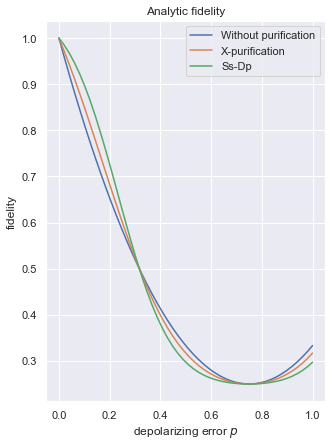

In [13]:
plt.figure(figsize=(5, 7))

xrange = np.linspace(0, 1)
plt.plot(xrange, [fidelity_wo_purification(x) for x in xrange] , label='Without purification')
plt.plot(xrange, [fidelity_X_purification(x) for x in xrange] , label='X-purification')
plt.plot(xrange, [fidelity_Ss_Dp(x) for x in xrange] , label='Ss-Dp')

plt.title('Analytic fidelity')
plt.xlabel('depolarizing error $p$')
plt.ylabel('fidelity')
plt.legend()

In [14]:
simplify(Ss_Dp_fidelity)

(224*p**4 - 672*p**3 + 756*p**2 - 378*p + 81)/(256*p**4 - 768*p**3 + 792*p**2 - 324*p + 81)

In [47]:
Ss_Dp_fidelity.subs(p, 0.75)

0.250000000000000

In [39]:
simplify(Ss_Dp_fidelity)

(448*p**5 - 1824*p**4 + 3096*p**3 - 2700*p**2 + 1215*p - 243)/(512*p**5 - 2112*p**4 + 3456*p**3 - 2808*p**2 + 1134*p - 243)

In [15]:
simplify(X_purified_fidelity)

(160*p**4 - 480*p**3 + 576*p**2 - 324*p + 81)/(128*p**4 - 384*p**3 + 432*p**2 - 216*p + 81)

In [16]:
simplify(fidelity_without_purification) 

p**2/3 + (p - 1)**2